In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline


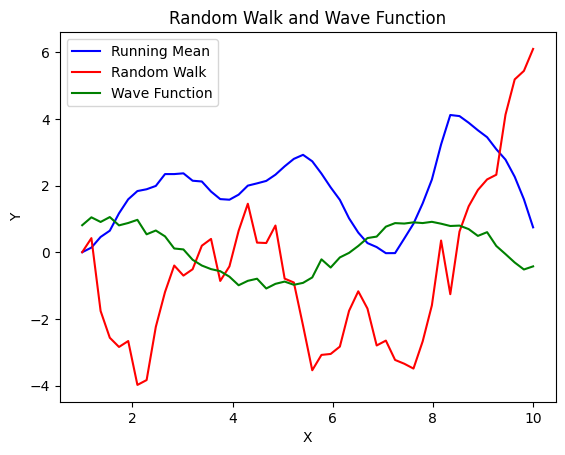

In [ ]:
# https://stackoverflow.com/questions/29050164/produce-random-wavefunction

x = np.linspace(1, 10)

def wave(x):
    return np.sin(x) + np.random.normal(scale=0.1, size=len(x))

def random_walk(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)

def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

plt.plot(x, runningMean(random_walk(x), 10), color='blue', label='Running Mean')
plt.plot(x, random_walk(x), color='red', label='Random Walk')
plt.plot(x, wave(x), color='green', label='Wave Function')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Walk and Wave Function')
plt.legend()
plt.show()

In [ ]:
# Most stimulus I think actually looks basically the same and then it changes a bit.

# for example lets look at the values of a pixel in a video.

# FPV of drone flying through forest: https://www.youtube.com/watch?v=mTzIT6JFKUY&ab_channel=FalconEyeDroneFootage

# I can likely just use a navigation dataset:

# https://github.com/NVIDIA-AI-IOT/redtail

# Or I can just use a web camera...



In [15]:
import cv2
import mediapy as media

cam = cv2.VideoCapture("/home/bam-gpu/intelligent_machines/dataset/cup_on_desk.MOV")
frames = []

# Get video resolution
width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Original Resolution: {width}x{height}")

# Set the downscale factor
scale_percent = 50  # Downscale by 50%
new_width = int(width * scale_percent / 100)
new_height = int(height * scale_percent / 100)
print(f"New Resolution: {width}x{height}")

display_width = int(width * 10 / 100)
display_height = int(height * 10 / 100)

# Loop through each frame and store it
while True:
    ret, frame = cam.read()
    if not ret:
        break  # Break if no frame is returned (end of video)
    
    # Downscale the frame
    frame_resized = cv2.resize(frame, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Convert frame to RGB (mediapy expects RGB format)
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)

# Release the video capture
cam.release()

# Display the video
media.show_video(frames, width=display_width, height=display_height, fps=30)

Original Resolution: 1080x1920
New Resolution: 1080x1920
